In [1]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'postechanalyticsfase3' # Project ID inserted based on the query results selected to explore
location = 'southamerica-east1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=postechanalyticsfase3:southamerica-east1:bquxjob_1c706d8_195b135df3a)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_1c706d8_195b135df3a') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT '112020' as MesAno
      ,COUNT(CASE B00113 WHEN 1 THEN 1 END)  as Diarreia
      ,COUNT(CASE B0014  WHEN 1 THEN 1 END)  as DificuldadeRespirar
      ,COUNT(CASE B0015  WHEN 1 THEN 1 END)  as DorCabeca
      ,COUNT(CASE B0013  WHEN 1 THEN 1 END)  as DorGarganta
      ,COUNT(CASE B00112 WHEN 1 THEN 1 END)  as DorMuscular
      ,COUNT(CASE B0016  WHEN 1 THEN 1 END)  as DorPeito
      ,COUNT(CASE B00110 WHEN 1 THEN 1 END)  as DorOlhos
      ,COUNT(CASE B0019  WHEN 1 THEN 1 END)  as Fadiga
      ,COUNT(CASE B0011  WHEN 1 THEN 1 END)  as Febre
      ,COUNT(CASE B0018  WHEN 1 THEN 1 END)  as NarizEntupidoEscorrendo
      ,COUNT(CASE B0017  WHEN 1 THEN 1 END)  as Nausea    
      ,COUNT(CASE B00111 WHEN 1 THEN 1 END)  as PerdaCheiroSabor
      ,COUNT(CASE B0012  WHEN 1 THEN 1 END)  as Tosse
      ,COUNT(*) TotalLinhas
FROM `PNAD_COVID.PNAD_COVID_112020` 
WHERE CASE 
                WHEN B009B = 1 THEN 1
                WHEN B009D = 1 THEN 1
                WHEN B009F = 1 THEN 1
       

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_1c706d8_195b135df3a') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df

,MesAno,Diarreia,DificuldadeRespirar,DorCabeca,DorGarganta,DorMuscular,DorPeito,DorOlhos,Fadiga,Febre,NarizEntupidoEscorrendo,Nausea,PerdaCheiroSabor,Tosse,TotalLinhas
0,072020,473,653,1058,766,902,502,505,812,957,696,483,895,971,5327
1,092020,286,409,813,544,667,318,319,593,640,498,303,619,664,9519
2,102020,213,304,654,472,523,229,217,485,517,436,249,484,545,10951
3,112020,281,342,734,560,607,274,262,555,588,512,300,549,663,12452
4,082020,467,622,1058,786,909,469,487,807,979,703,483,834,932,7639


## Show descriptive statistics using describe()
Use the ```DataFrame.describe()```
[method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.dataframe.DataFrame#bigframes_dataframe_DataFrame_describe)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
# Generate descriptive statistics.
bq_df.describe()

,Diarreia,DificuldadeRespirar,DorCabeca,DorGarganta,DorMuscular,DorPeito,DorOlhos,Fadiga,Febre,NarizEntupidoEscorrendo,Nausea,PerdaCheiroSabor,Tosse,TotalLinhas
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,344.0,466.0,863.4,625.6,721.6,358.4,358.0,650.4,736.2,569.0,363.6,676.2,755.0,9177.6
std,118.600169,161.379986,186.327132,141.417114,175.512962,120.782035,131.213566,150.325647,216.200601,122.539789,111.089153,179.698915,186.29949,2791.84559
min,213.0,304.0,654.0,472.0,523.0,229.0,217.0,485.0,517.0,436.0,249.0,484.0,545.0,5327.0
25%,281.0,342.0,734.0,544.0,607.0,274.0,262.0,555.0,588.0,498.0,300.0,549.0,663.0,7639.0
50%,286.0,409.0,813.0,560.0,667.0,318.0,319.0,593.0,640.0,512.0,303.0,619.0,664.0,9519.0
75%,467.0,622.0,1058.0,766.0,902.0,469.0,487.0,807.0,957.0,696.0,483.0,834.0,932.0,10951.0
max,473.0,653.0,1058.0,786.0,909.0,502.0,505.0,812.0,979.0,703.0,483.0,895.0,971.0,12452.0


In [6]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

/usr/local/lib/python3.10/dist-packages/bigframes/core/blocks.py:142: NullIndexPreviewWarning: Creating object with Null Index. Null Index is a preview feature.
  warnings.warn(msg, category=bfe.NullIndexPreviewWarning)


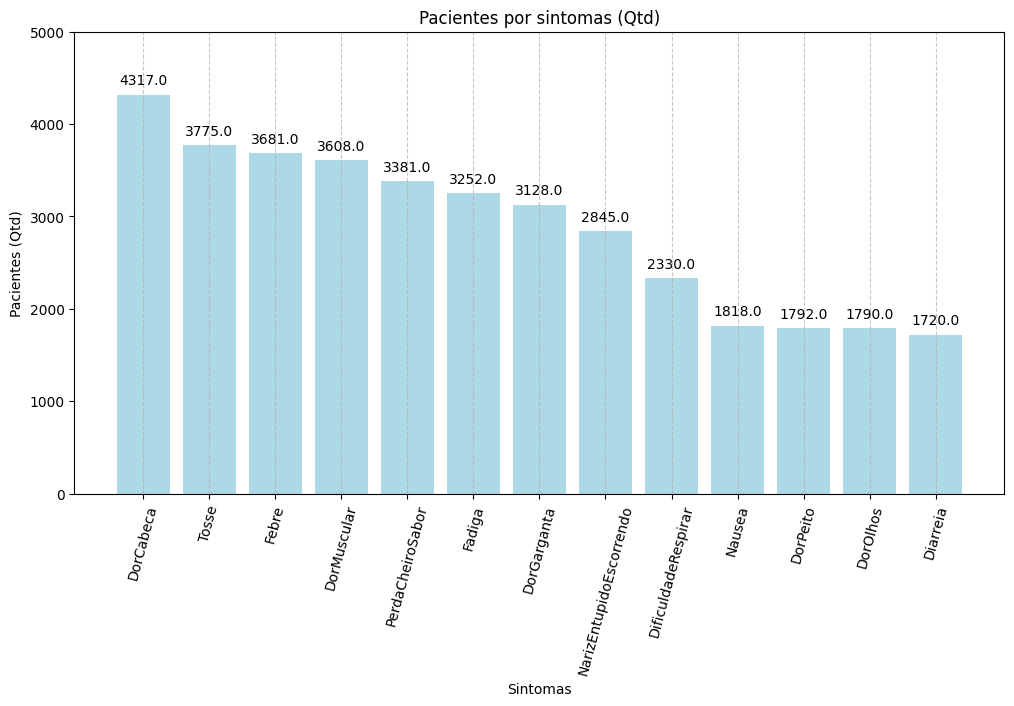

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que bq_df já esteja carregado
# Removendo as colunas 'MesAno' e 'TotalLinhas' se existirem
colunas_sintomas = bq_df.columns.difference(['MesAno', 'TotalLinhas'])

# Somando os valores de cada coluna
soma_sintomas = bq_df[colunas_sintomas].sum()

# Ordenando do maior para o menor
soma_sintomas = soma_sintomas.sort_values(ascending=False)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criando o gráfico de barras horizontais
barras = ax.bar(soma_sintomas.index, soma_sintomas.values, color='lightblue')

# Adicionando rótulos diretamente nas barras
ax.bar_label(barras, fmt='%.1f', padding=5, fontsize=10, color='black')

# Personalizando o gráfico
ax.set_xlabel("Sintomas")
ax.set_ylabel("Pacientes (Qtd)")
ax.set_ylim(0,5000)
ax.set_title("Pacientes por sintomas (Qtd)")
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=75)

# Exibindo o gráfico
plt.show()